This notebook is used to visualize molecules.

In [1]:
import numpy as np
import pandas as pd

from rdkit.Chem import Draw, MolFromSmiles, MolToSmiles

In [2]:
#benchmark: BACE, BBBP, HIV | ESOL, FreeSolv, Lipop
#opioids: MDR1, CYP2D6, CYP3A4 | MOR, DOR, KOR
folder = 'opioids'
mol_prop = 'KOR'

-  Note: use **Structure_Analysis.ipynb** to generate the scaffolds_freq.csv and structural_traits.csv for each molecular property

# Visualize top scaffolds 

In [3]:
# get scaffolds frequency  
scaffold_freq = pd.read_csv('../results/structures/{folder}/{mol_prop}_scaffolds_freq.csv'\
                            .format(folder=folder, mol_prop=mol_prop))

In [4]:
scaffold_freq.head()

,SMILES,freq,rank
0,c1ccc(C2CCN(C(c3ccccc3)c3ccccc3)CC2)cc1,59,1
1,O=C1CCCC2CC[C@H]3C(=O)O[C@H](c4ccoc4)CC3[C@@H]12,47,2
2,O=c1cnc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,34,3
3,c1cc2c3c(c1)O[C@H]1C4CCC5(CC4)[C@@H](C2)N(CC2C...,34,4
4,O=c1c(-c2ccccc2)cccn1C(CN1CCCC1)c1ccccc1,33,5


In [5]:
print("Number of Scaffolds: ", scaffold_freq.shape[0])

Number of Scaffolds:  1660


In [6]:
# keep top 30 scaffolds 
scaffold_freq = scaffold_freq.head(30)

Property:  KOR


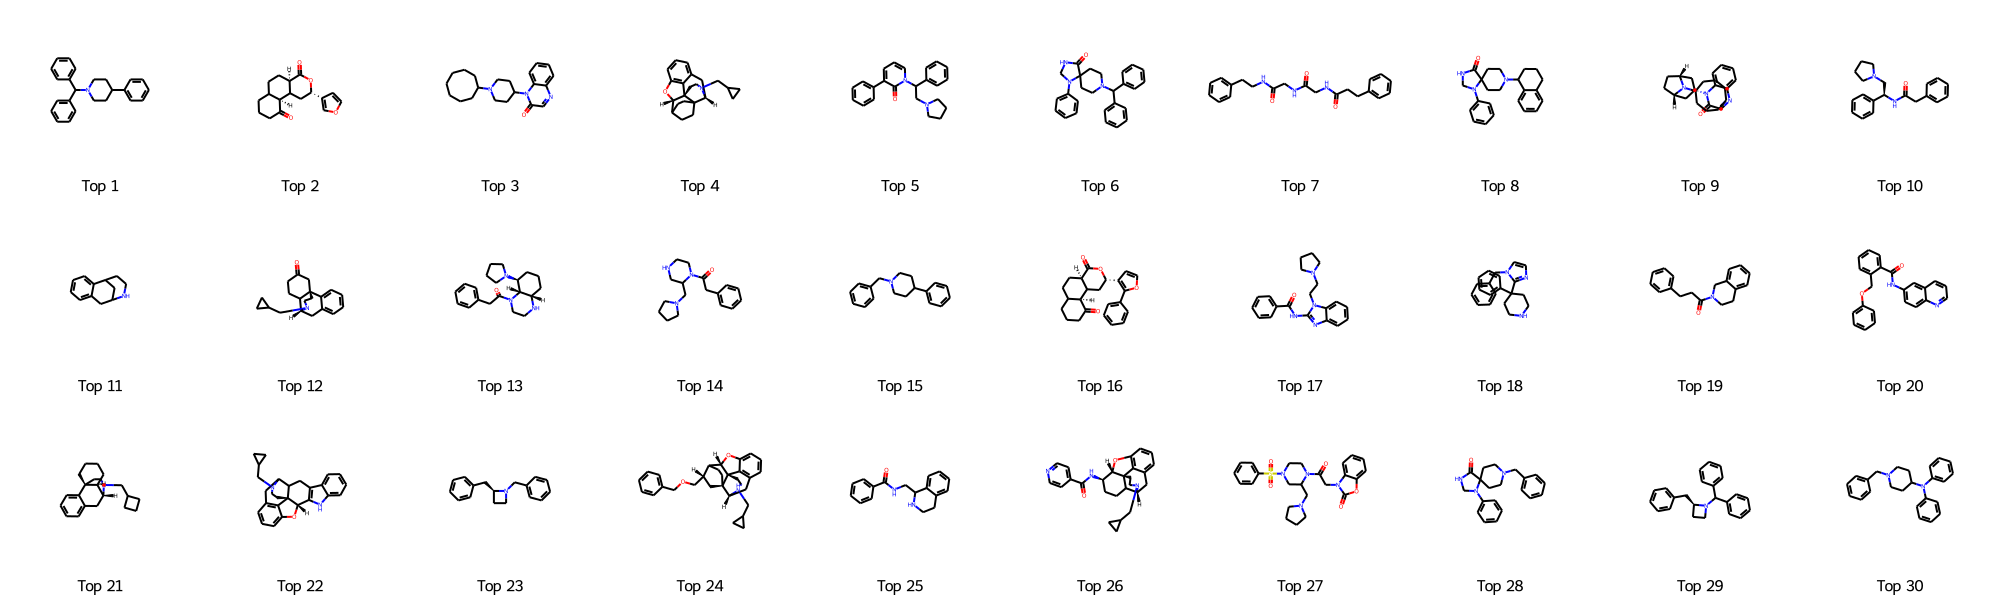

In [7]:
print("Property: ", mol_prop)

# get the scaffols list for visualization 
scaffolds = scaffold_freq['SMILES'].values

mols = []
for s in scaffolds:
    if s is None:
        continue
    mol = MolFromSmiles(s)
    mol.SetProp("_Name", "Top {i}".format(i=1+np.where(scaffolds==s)[0][0]))
    if mol is not None:
        mols.append(mol)
        
img = Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(200, 200), legends=[x.GetProp("_Name") for x in mols], returnPNG=False)#
img.save('../results/structures/scaffolds/{mol_prop}_top30scaffolds.pdf'.format(mol_prop=mol_prop))
img

# Visualize AC molecules

-  using KOR top 14 scaffold as an example

In [8]:
# get the structural_traits df 
data = pd.read_csv('../results/structures/{folder}/{mol_prop}_structural_traits.csv'\
                   .format(folder=folder, mol_prop=mol_prop))

In [9]:
top_N = 14

In [10]:
data.head()

,SMILES,label,scaffold,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,...,n_hetero_atoms,n_stereo_centers,n_hba,n_hbd,n_rota_bonds,n_rings,n_alipha_rings,n_aroma_rings,n_hetero_rings,n_spiro_atoms
0,O=C(Cc1ccc(Cl)c(Cl)c1)N1[C@H](CN2CCCC2)CCC[C@@...,1.303787,O=C(Cc1ccccc1)N1CCCC[C@H]1CN1CCCC1,0,1,1,0,0,0,0,...,6,0,3,1,5,3,2,1,2,0
1,O=[N+]([O-])c1cc2c(cc1CN1CCC(n3c(O)nc4ccccc43)...,5.389082,c1ccc2c(c1)ncn2C1CCN(Cc2ccc3c(c2)OCO3)CC1,0,0,0,0,0,2,0,...,9,0,8,1,4,5,2,3,3,0
2,COC(=O)c1csc(S(=O)(=O)N2CCN(C(=O)c3ccccc3Nc3cc...,0.112624,O=C(c1ccccc1Nc1ccccc1)N1CCN(S(=O)(=O)c2cccs2)CC1,0,0,0,0,0,0,0,...,11,0,8,1,7,4,1,3,2,0
3,O=C(Cc1c[nH]c2ccc(Br)cc12)N1CCN(c2ccc([N+](=O)...,2.082294,O=C(Cc1c[nH]c2ccccc12)N1CCN(c2cccc3nonc23)CC1,0,0,0,0,0,3,1,...,11,0,7,1,4,5,1,4,3,0
4,O=C(CCc1ccc(F)cc1)N1CCN(CCCC(c2ccc(F)cc2)c2ccc...,1.055508,O=C(CCc1ccccc1)N1CCN(CCCC(c2ccccc2)c2ccccc2)CC1,0,0,0,0,0,0,0,...,6,0,2,0,9,4,1,3,1,0


Property:  KOR


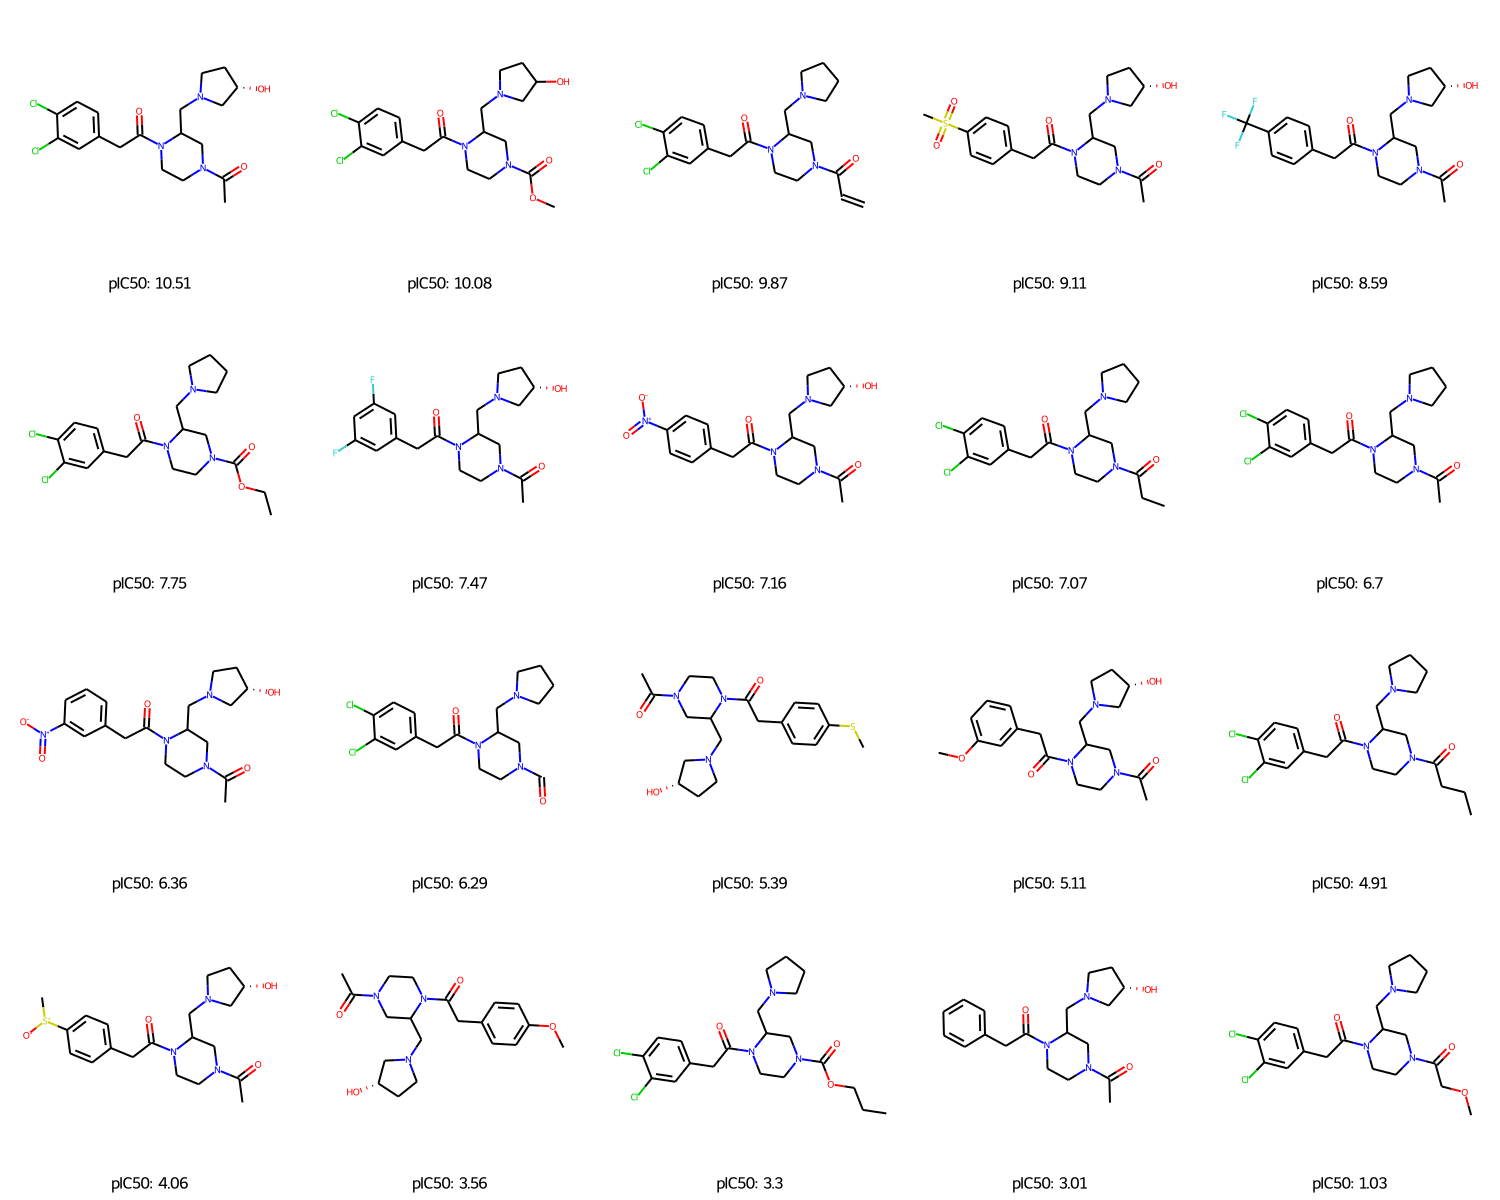

In [12]:
print("Property: ", mol_prop)

# select molecules based on the topN scaffold
tmp = data[data['scaffold']==scaffolds[top_N - 1]]

# sort SMILES and labels by label value
ac_examples = tmp.sort_values(by='label', ascending=False)['SMILES'].values
pIC50_values = tmp.sort_values(by='label', ascending=False)['label'].values

mols = []
for s in ac_examples:
    if s is None:
        continue
    mol = MolFromSmiles(s)
    mol.SetProp("_Name", "pIC50: {v}".format(v=round(pIC50_values[np.where(ac_examples==s)][0],2)))
    if mol is not None:
        mols.append(mol)
        
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300), legends=[x.GetProp("_Name") for x in mols], returnPNG=False)#
img.save('../results/structures/ACs/{mol_prop}_top{top_N}_ACmolecules.pdf'.format(mol_prop=mol_prop, top_N=top_N))
img